# 权重衰减（weight decay）是最广泛使用的正则化的技术之一

In [1]:
%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l

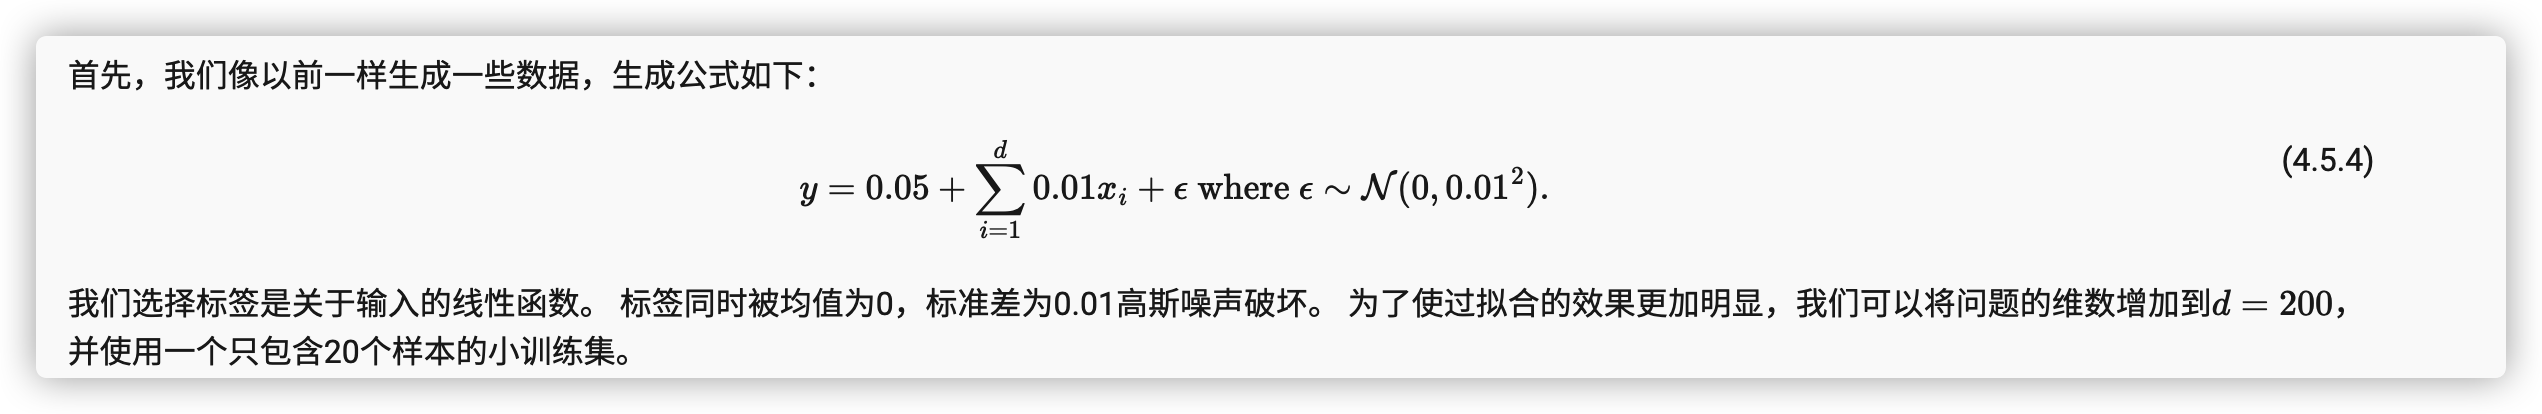

In [2]:
n_train, n_test, num_inputs, batch_size = 20, 100, 200, 5
true_w, true_b = torch.ones((num_inputs, 1)) * 0.01, 0.05
train_data = d2l.synthetic_data(true_w, true_b, n_train)
train_iter = d2l.load_array(train_data, batch_size)
test_data = d2l.synthetic_data(true_w, true_b, n_test)
test_iter = d2l.load_array(test_data, batch_size, is_train=False)

In [3]:
# 初始化模型参数w,b
def init_params():
    w = torch.normal(0, 1, size=(num_inputs, 1), requires_grad=True)
    b = torch.zeros(1, requires_grad=True)
    return [w, b]

In [4]:
# 实现范数惩罚
def l2_penalty(w):
    return torch.sum(w.pow(2)) / 2
def l1_penalty(w):
    return torch.sum(torch.abs(w))

In [27]:

def train(lambd):
    w, b = init_params()
    net, loss = lambda X: d2l.linreg(X, w, b), d2l.squared_loss
    num_epochs, lr = 100, 0.003
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            # 增加了L2范数惩罚项，
            # 广播机制使l2_penalty(w)成为一个长度为batch_size的向量
            l = loss(net(X), y) + lambd * l2_penalty(w)
            l.sum().backward()
            d2l.sgd([w, b], lr, batch_size)
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss),
                                     d2l.evaluate_loss(net, test_iter, loss)))
    print('w的L2范数是：', torch.norm(w).item())

w的L2范数是： 12.940272331237793


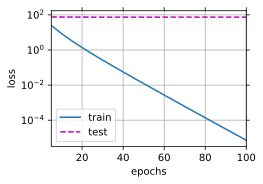

In [28]:
# 过拟合
train(lambd=0)

w的L2范数是： 0.3402102589607239


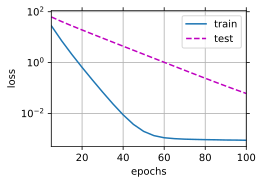

In [29]:
train(3)

w的L2范数是： 0.012660504318773746


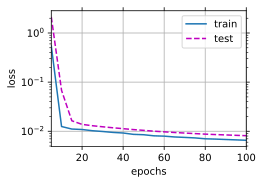

In [30]:
w = train(30)
w

w的L2范数是： 0.004016705323010683


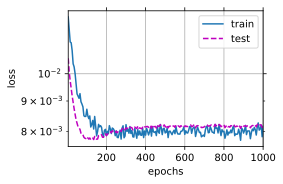

In [14]:
# 欠拟合
train(100)

## 使用机器学习方法解决实际问题时，我们通常要用L1或L2范数做正则化（regularization），从而限制权值大小，减少过拟合风险。特别是在使用梯度下降来做目标函数优化时，

In [17]:
print('真实w的L2范数是：', torch.norm(true_w).item())

真实w的L2范数是： 0.14142125844955444


In [23]:
torch.norm(true_w),true_w.shape,W

NameError: name 'W' is not defined

# 简洁实现

In [32]:
def train_concise(wd):
    net = nn.Sequential()
    net.add(nn.Dense(1))
    net.initialize(init.Normal(sigma=1))
    loss = gluon.loss.L2Loss()
    num_epochs, lr = 100, 0.003
    trainer = gluon.Trainer(net.collect_params(), 'sgd',
                            {'learning_rate': lr, 'wd': wd})
    # 偏置参数没有衰减。偏置名称通常以“bias”结尾
    net.collect_params('.*bias').setattr('wd_mult', 0)
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            with autograd.record():
                l = loss(net(X), y)
            l.backward()
            trainer.step(batch_size)
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss),
                                     d2l.evaluate_loss(net, test_iter, loss)))
    print('w的L2范数：', np.linalg.norm(net[0].weight.data()))

In [33]:
train_concise(30)

AttributeError: 'Sequential' object has no attribute 'add'